<a href="https://colab.research.google.com/github/Jllin50/UFO/blob/master/UFO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install maya

In [0]:

import maya
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/Jllin50/UFO/master/scrubbed.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
df = df[df['country'] == 'us']

In [31]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [0]:
df = df.rename(columns={"longitude ": "longitude"})

In [33]:
df.shape

(65114, 11)

In [0]:
df.reset_index(drop=True, inplace=True)

In [0]:
year_list = []
for i in range(len(df)):
  try:
    dt = maya.parse(df['datetime'][i]).datetime()
    year_list.append(dt.year)
  except:
    year_list.append('NaN')

  

In [0]:
df['year'] = year_list

In [0]:
year_group = df.groupby('year')

In [0]:
year_graph = year_group['datetime'].count()

In [39]:
year_graph

year
1910       1
1920       1
1925       1
1929       1
1931       2
        ... 
2011    4352
2012    6282
2013    6024
2014    1960
NaN      487
Name: datetime, Length: 84, dtype: int64

# Graphing UFO sightings by Year

Text(0.5, 0, 'Year')

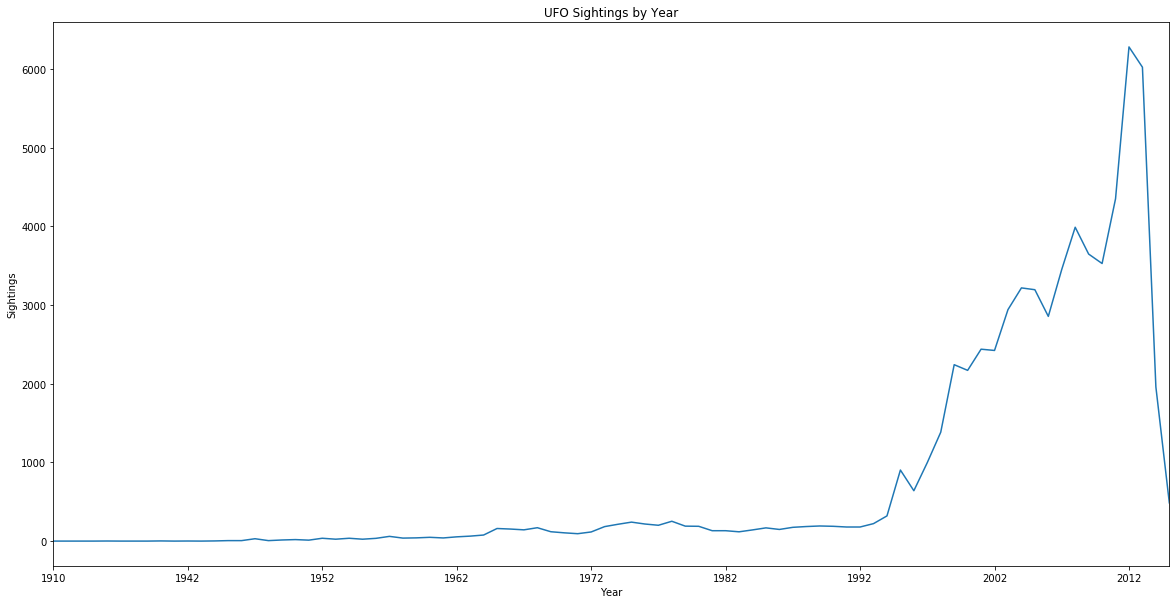

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylabel('Sightings')
year_graph.plot(title="UFO Sightings by Year")
ax.set_xlabel('Year')


In [41]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949
1,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956
2,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960
3,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961
4,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965


In [42]:
#finding the most frequent duration time
df['duration (seconds)'].describe()

count     65114
unique      620
top         300
freq       5819
Name: duration (seconds), dtype: object

# Bar Plot for States with Most Sightings

In [0]:
heatmap = df.groupby('state')
labels = ['California', 'Washington', 'Florida', 'Texas', 'New York' ]

No handles with labels found to put in legend.


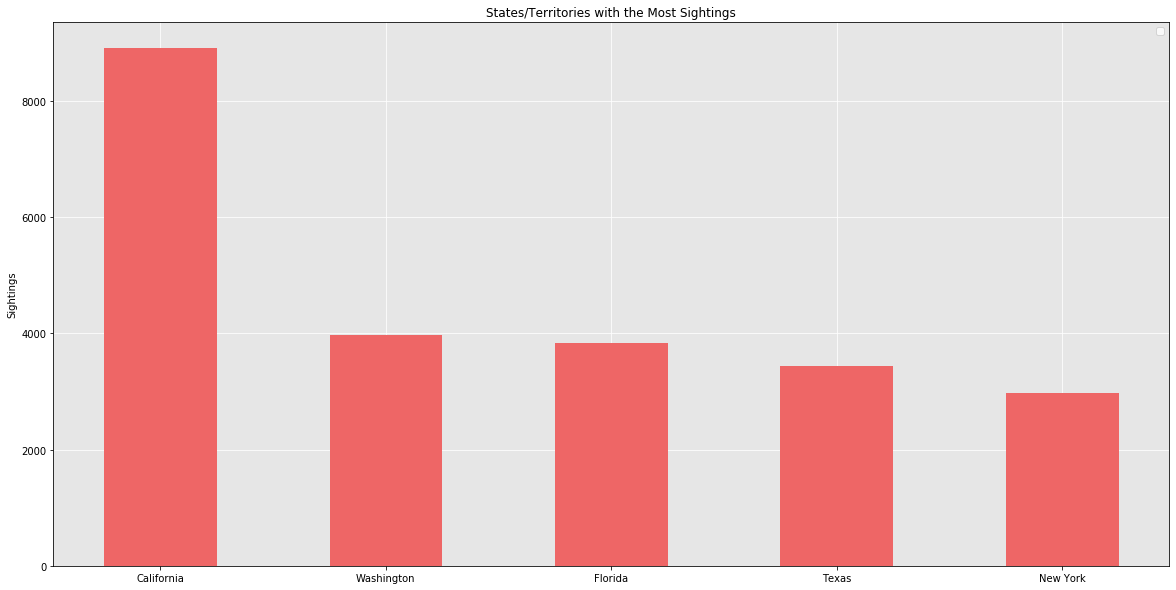

In [44]:
width = 0.5  # the width of the bars
alist = heatmap.count()['datetime'].sort_values(ascending = False)[:5].tolist()

fig, ax= plt.subplots(figsize=(20,10), )
rects1 = ax.bar(labels, alist, width,color='#EE6666')
plt.grid(color='w', linestyle='solid')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sightings')
ax.set_facecolor('#E6E6E6')
ax.set_axisbelow(True)
ax.set_title('States/Territories with the Most Sightings')
ax.set_xticklabels(labels)
ax.legend()


In [45]:
heatmap.count()['datetime'].sort_values()[:5]

state
dc      7
pr     25
nd    129
de    166
wy    175
Name: datetime, dtype: int64

# 

No handles with labels found to put in legend.


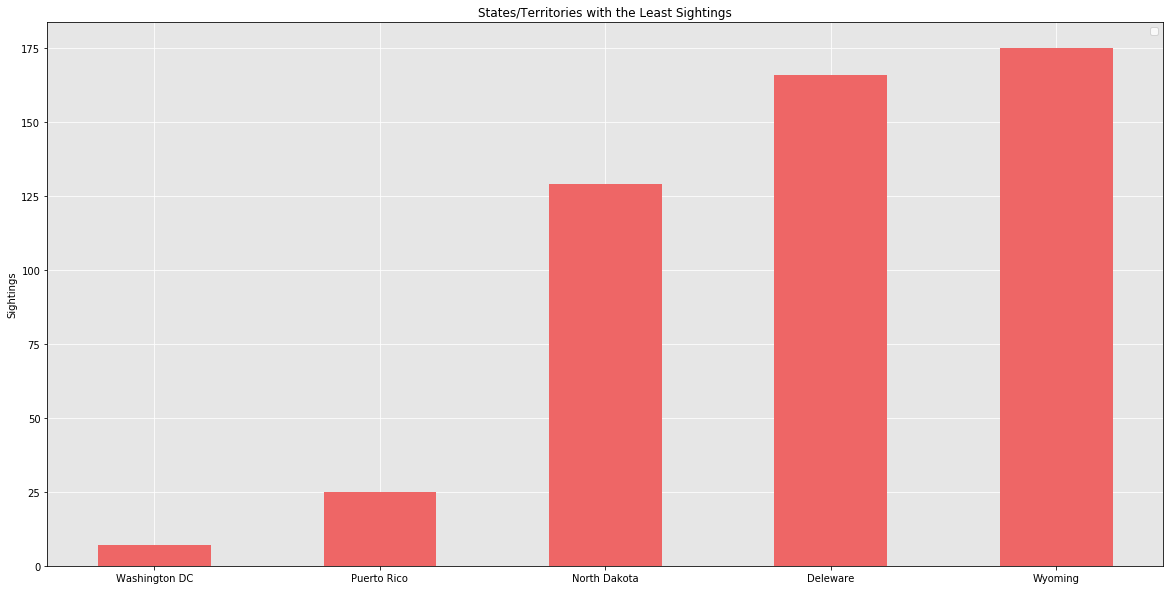

In [46]:
#bottom 5 cities
width = 0.5  # the width of the bars
labels= ['Washington DC', 'Puerto Rico', 'North Dakota', 'Deleware', 'Wyoming']
alist = heatmap.count()['datetime'].sort_values()[:5].tolist()

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(labels, alist, width,color='#EE6666')
plt.grid(color='w', linestyle='solid')





# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sightings')
ax.set_title('States/Territories with the Least Sightings')
ax.set_xticklabels(labels)
ax.set_axisbelow(True)

ax.set_facecolor('#E6E6E6')

ax.legend()


In [0]:
locations = pd.read_csv('https://raw.githubusercontent.com/Jllin50/UFO/master/states.csv')

In [64]:
locations.head()

,State,Latitude,Longitude,Size
0,wi,44.5,-89.500000,1232.0
1,wv,39.0,-80.500000,448.0
2,vt,44.0,-72.699997,260.0
3,tx,31.0,-100.000000,3447.0
4,sd,44.5,-100.000000,183.0


In [49]:
test = df.groupby('city')
test['datetime'].count().sort_values(ascending=False)[:5]

city
seattle        524
phoenix        454
portland       373
las vegas      367
los angeles    352
Name: datetime, dtype: int64

No handles with labels found to put in legend.


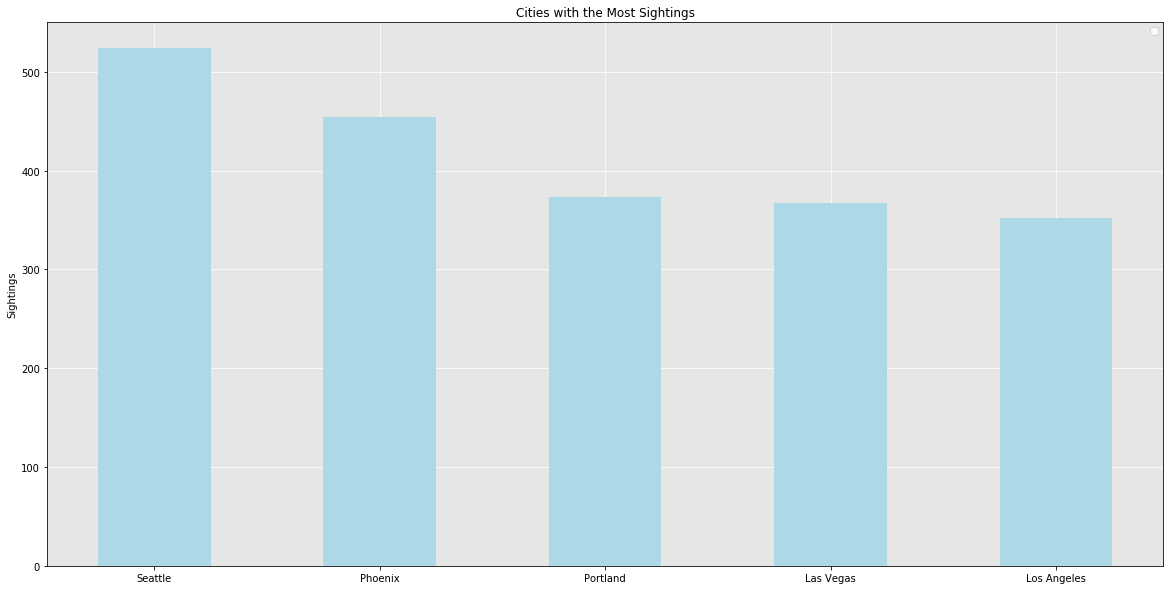

In [52]:
alist = test['datetime'].count().sort_values(ascending=False)[:5].to_list()
labels= ['Seattle', 'Phoenix', 'Portland', 'Las Vegas', 'Los Angeles']

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(labels, alist, width,color='#add8e6')
plt.grid(color='w', linestyle='solid')






# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sightings')
ax.set_title('Cities with the Most Sightings')
ax.set_xticklabels(labels)
ax.set_axisbelow(True)

ax.set_facecolor('#E6E6E6')

ax.legend()





In [57]:
test['datetime'].count().sort_values(ascending=False)[:20]

city
seattle          524
phoenix          454
portland         373
las vegas        367
los angeles      352
san diego        338
houston          297
chicago          264
tucson           241
miami            239
austin           218
orlando          218
springfield      214
albuquerque      213
sacramento       201
columbus         200
san jose         189
san francisco    186
denver           185
san antonio      175
Name: datetime, dtype: int64

In [129]:
test['datetime'].count().sort_values()[:5]

city
locust fork                       1
merkel                            1
meriwether county (rural)         1
meriwether county (greenville)    1
meriwether  county (rural)        1
Name: datetime, dtype: int64

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/Jllin50/UFO/master/data.csv')

In [56]:
population.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727
1,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204
2,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256
3,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211
4,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449
